In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from fastai.imports import *

In [3]:
PATH = '/home/paperspace/data/materialist/'
sz=224
arch=resnext101_64
#arch=resnet34
bs=16

In [4]:
label_csv = f'{PATH}labels_2.csv'
label_df = pd.read_csv(label_csv)

In [5]:
n = len(list(open(label_csv))) -1 
val_idxs = get_cv_idxs(n, val_pct=.21)

In [6]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, f'{PATH}merged/train', f'{PATH}labels_2.csv', test_name='test', 
                                    val_idxs=val_idxs, 
                                    tfms=tfms, 
                                    bs=bs)

In [7]:
learn = ConvLearner.pretrained(arch, data, precompute=True, ps=.5)

In [8]:
learn.load('materialist_10164_1')

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 69%|██████▉   | 6439/9292 [00:58<00:25, 110.25it/s, loss=6.68]

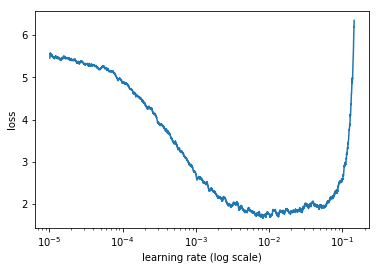

 69%|██████▉   | 6439/9292 [01:10<00:31, 91.90it/s, loss=6.68] 

In [9]:
lrf=learn.lr_find()
learn.sched.plot()

In [12]:
lr = 5e-3
learn.precompute = True
learn.fit(lr, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                       
    0      1.075014   0.820179   0.76013   
    1      1.114461   0.796286   0.766358                       



[0.7962859, 0.7663579622140297]

In [13]:
learn.save('materialist_10164_1')

In [9]:
learn.precompute = False

In [11]:
lr = 5e-3
learn.fit(lr, 3t, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

TypeError: eq received an invalid combination of arguments - got (numpy.ndarray), but expected one of:
 * (int value)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.ndarray[0m)
 * (torch.cuda.LongTensor other)
      didn't match because some of the arguments have invalid types: ([31;1mnumpy.ndarray[0m)


In [ ]:
learn.save('materialist_10164_precompute_false')

In [ ]:
lrf=learn.lr_find()
learn.sched.plot()

In [ ]:
lr=np.array([1e-4,1e-3,1e-2])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.load('materials_unfrozen_2')

In [ ]:
def get_data(sz):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_csv(PATH, f'{PATH}merged/train', f'{PATH}labels.csv', test_name='test', 
                                    val_idxs=val_idxs, 
                                    tfms=tfms, 
                                    bs=bs)

In [ ]:
learn.set_data(get_data(299))

In [ ]:
learn.freeze()

In [ ]:
learn.fit(1e-2, 3, cycle_len=1)

In [ ]:
learn.save('materialist_299')

In [ ]:
learn.fit(1e-2, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.load('materialist_299_2')

In [ ]:
log_preds,y = learn.TTA(n_aug=4, is_test=True)
preds = np.mean(log_preds, 0)
probs = np.mean(np.exp(log_preds), axis=0)
indices = probs.argmax(axis=1)

In [ ]:
accuracy_np(probs, y)

In [ ]:
preds = probs.argmax(axis=1)

In [ ]:
indexed_preds = [data.classes[pred] for pred in preds]

In [ ]:
def trim_jpeg(filename):
    slash_index = filename.index('/') + 1
    dot_index = filename.index('.')
    return filename[slash_index:dot_index]

In [ ]:
def get_filename_indices():
    filenames = data.test_ds.fnames
    filenames = [int(trim_jpeg(filename)) for filename in filenames]
    return filenames

In [ ]:
def get_filenames():
    filenames = data.test_ds.fnames
    filenames = [trim_jpeg(filename) for filename in filenames]
    return filenames

In [ ]:
def get_missing(indices):
    acc = []
    for x in range(1, 12800):
        if x not in indices:
            acc.append(x)
    return acc

In [ ]:
missing_indices = get_missing(get_filename_indices())

In [ ]:
filenames = get_filenames()

In [ ]:
missing_indices

In [ ]:
with open(f'{PATH}large_submission.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerow(('id', 'predicted'))
    writer.writerows(zip(filenames, indexed_preds))
    for m in missing_indices:
        writer.writerow((m, 1))

In [ ]:
def get_missing(indices):
    acc = []
    for x in range(1, 12800):
        if x not in indices:
            acc.append(x)
    return acc

In [ ]:
def make_submission(preds, incidces):
    missing = get_missing(indices)
    with open(f'{PATH}submission.csv', 'w') as f:
        writer = csv.writer(f)
        writer.writerow(('id', 'predicted'))
        writer.writerows(zip(indices, preds))
        for m in missing:
            writer.writerow((m, 1))

In [ ]:
make_submission(indexed_preds, indices)